# My Financial Analysis

7/3/2020  

This is my first attempt at ever doing any "financial analysis". This is a simple tool I am creating to understand historical trends of stock prices for companies I am interested in.
This is not meant to be a complete financial analysis, and is definitely NOT a tool I endorse to make recommendations on stocks. I am taking two of my recent found interests (Data science and investing), throwing them together, and see what happens! Voila!

*Disclaimer: I have not taken any Finance or Computer Science courses past the introductory classes at UT: FIN320F and CS350e


# Getting Data

You must first install pandas-datareader to use this code! You can install using (**pip install pandas-datareader**)

The pandas-datareader package gets data via remote data access from various internet sources into a pandas DataFrame. The various API's supported by the pandas-datareader package continually change. At the time of writing (7/18/2020), it supported many sources like Stooq, Tiingo and IEX, but not Google Finance or Yahoo Finance. Yahoo Finance was the gold standard for stock data API's until it was shut down in 2017; However, it came back up in 2019. 
[Source](https://towardsdatascience.com/best-5-free-stock-market-apis-in-2019-ad91dddec984)

In my first implementation of this code, I was using the pandas-datareader package to load data from Stooq. 
Then I switched to pandas-datareader with Yahoo Finance

*Edit: Yahoo Finance is not listed as a supported source in the official pandas-datareader [documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html); However, by digging around the [GitHub](https://github.com/pydata/pandas-datareader), I found code still existed to pull from Yahoo finance. This is likely an artifact from years ago when pandas-datareader did support Yahoo. 

Understanding the pros and cons of pandas_datareader: The pandas-datareader package relies on various API's to fetch stock data. In general, the API's may not be the most stable source of data. However, through pandas-datareader, the Yahoo Finance API has a few advantages:
1. Adjusted close price stock market data is available. 
2. Most recent stock market data is available
3. Doesn't require API key to fetch the stock market data
[Source](https://blog.quantinsti.com/stock-market-data-analysis-python/)

Although I ended up using pandas-datareader for this project, the yfinance package has a lot of utility as well. The yfinance package wraps the new Yahoo Finance API. 
The yfinance module provides minute level stock market data, instead of just at a daily level.
This module also provides fundamental data such as P/E ratios, revenue, EBIT, income statement, balance sheet, cash flows, and more info.
[Source](https://blog.quantinsti.com/stock-market-data-analysis-python/) 

# Look at this pandas web reader to get Yahoo Finance data! https://dash.plotly.com/introduction

Also look at using Dash as a landing spot for the final output of this program

# Import Statements

In [1]:
# Import all the packages you need

# Pandas-Datareader allows you to pull stock information directly from the internet using different API's
from pandas_datareader import data, wb

# Import the usual packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import datetime

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# Data Preparation

In [2]:
# Set the start and end dates for your analysis. The end date is set to current day by default
start_date = '2015-01-01'
end_date = datetime.date.today().strftime('%Y-%m-%d')

In [3]:
# List the ticker symbols you are interested in (as strings) 
tickers = ["AAL", "ZM", "NFLX", "SPY", "VOO", "VXX", "CCL", "JETS","MSFT","CNK", "SPT", "SQ","XOP","NKLA","PTON","APT","FSLY","DDOG","PYPL","TSLA","AMZN"]

In [4]:
# I want to store each df separately to do Bollinger band plots later on
each_df = {}
for ticker in tickers:
    each_df[ticker] = data.DataReader(ticker, 'yahoo', start_date, end_date)

In [10]:
# Concatenating dataframes for each ticker together to create a single dataframe called stocks
stocks = pd.concat(each_df, axis=1, keys = tickers)

In [11]:
# # Concatenating dataframes for each ticker together to create a single dataframe called stocks
# list_dfs = []
# for ticker in tickers:
#     list_dfs.append(data.DataReader(ticker, 'yahoo', start_date, end_date))

# stocks = pd.concat(list_dfs, axis=1, keys = tickers)

In [12]:
# Setting names for the multi-index 
stocks.columns.names = ['Ticker Symbol','Stock Info']

In [13]:
# What does the df look like
stocks.head()

Ticker Symbol        AAL                                               \
Stock Info          High        Low       Open      Close      Volume   
Date                                                                    
2015-01-02     54.599998  53.070000  54.279999  53.910000  10748600.0   
2015-01-05     54.540001  53.340000  54.369999  53.880001  11565000.0   
2015-01-06     54.430000  52.130001  54.270000  53.040001  13772200.0   
2015-01-07     53.650002  52.119999  53.380001  53.009998  10069800.0   
2015-01-08     54.279999  53.250000  53.480000  53.660000   9672100.0   

Ticker Symbol              ZM                 ...        TSLA              \
Stock Info     Adj Close High Low Open Close  ...        Open       Close   
Date                                          ...                           
2015-01-02     51.079918  NaN NaN  NaN   NaN  ...  222.869995  219.309998   
2015-01-05     51.051483  NaN NaN  NaN   NaN  ...  214.550003  210.089996   
2015-01-06     50.255585  NaN NaN  NaN   NaN  ...  210.059998  211.279999   
2015-01-07     50.227158  NaN NaN  NaN   NaN  ...  213.350006  210.949997   
2015-01-08     50.843037  NaN NaN  NaN   NaN  ...  212.809998  210.619995   

Ticker Symbol                             AMZN                          \
Stock Info      Volume   Adj Close        High         Low        Open   
Date                                                                     
2015-01-02     4764400  219.309998  314.750000  306.959991  312.579987   
2015-01-05     5368500  210.089996  308.380005  300.850006  307.010010   
2015-01-06     6261900  211.279999  303.000000  292.380005  302.239990   
2015-01-07     2968400  210.949997  301.279999  295.329987  297.500000   
2015-01-08     3442500  210.619995  303.140015  296.109985  300.320007   

Ticker Symbol                                   
Stock Info          Close   Volume   Adj Close  
Date                                            
2015-01-02     308.519989  2783200  308.519989  
2015-01-05     302.190002  2774200  302.190002  
2015-01-06     295.290009  3519000  295.290009  
2015-01-07     298.420013  2640300  298.420013  
2015-01-08     300.459991  3088400  300.459991  

[5 rows x 126 columns]

# Understanding the Data

In [14]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1395 entries, 2015-01-02 to 2020-07-17
Columns: 126 entries, (AAL, High) to (AMZN, Adj Close)
dtypes: float64(123), int64(3)
memory usage: 1.4 MB


In [15]:
stocks.describe().transpose()

count          mean           std           min  \
Ticker Symbol Stock Info                                                     
AAL           High        1395.0  3.915670e+01  1.042757e+01  9.190000e+00   
              Low         1395.0  3.796995e+01  1.036088e+01  8.250000e+00   
              Open        1395.0  3.858266e+01  1.038763e+01  8.770000e+00   
              Close       1395.0  3.853857e+01  1.040952e+01  9.040000e+00   
              Volume      1395.0  1.377393e+07  2.597237e+07  1.352400e+06   
...                          ...           ...           ...           ...   
AMZN          Low         1395.0  1.212982e+03  6.106726e+02  2.852500e+02   
              Open        1395.0  1.226721e+03  6.188923e+02  2.862800e+02   
              Close       1395.0  1.226796e+03  6.191938e+02  2.869500e+02   
              Volume      1395.0  4.287462e+06  2.270594e+06  8.813000e+05   
              Adj Close   1395.0  1.226796e+03  6.191938e+02  2.869500e+02   

                                   25%           50%           75%  \
Ticker Symbol Stock Info                                             
AAL           High        3.288500e+01  4.074000e+01  4.696500e+01   
              Low         3.181500e+01  3.957000e+01  4.579000e+01   
              Open        3.227000e+01  4.013000e+01  4.642000e+01   
              Close       3.225500e+01  4.002000e+01  4.643500e+01   
              Volume      5.439600e+06  7.353500e+06  1.053805e+07   
...                                ...           ...           ...   
AMZN          Low         6.986750e+02  1.001250e+03  1.753960e+03   
              Open        7.050200e+02  1.009270e+03  1.773925e+03   
              Close       7.052950e+02  1.009130e+03  1.773630e+03   
              Volume      2.793350e+06  3.674700e+06  5.052200e+06   
              Adj Close   7.052950e+02  1.009130e+03  1.773630e+03   

                                   max  
Ticker Symbol Stock Info                
AAL           High        5.908000e+01  
              Low         5.780000e+01  
              Open        5.879000e+01  
              Close       5.847000e+01  
              Volume      4.286171e+08  
...                                ...  
AMZN          Low         3.135700e+03  
              Open        3.251060e+03  
              Close       3.200000e+03  
              Volume      2.385610e+07  
              Adj Close   3.200000e+03  

[126 rows x 8 columns]

Visualize missing values in yellow.   
Missing values could be due to unstable API's or just because a company had not IPO'd yet. 

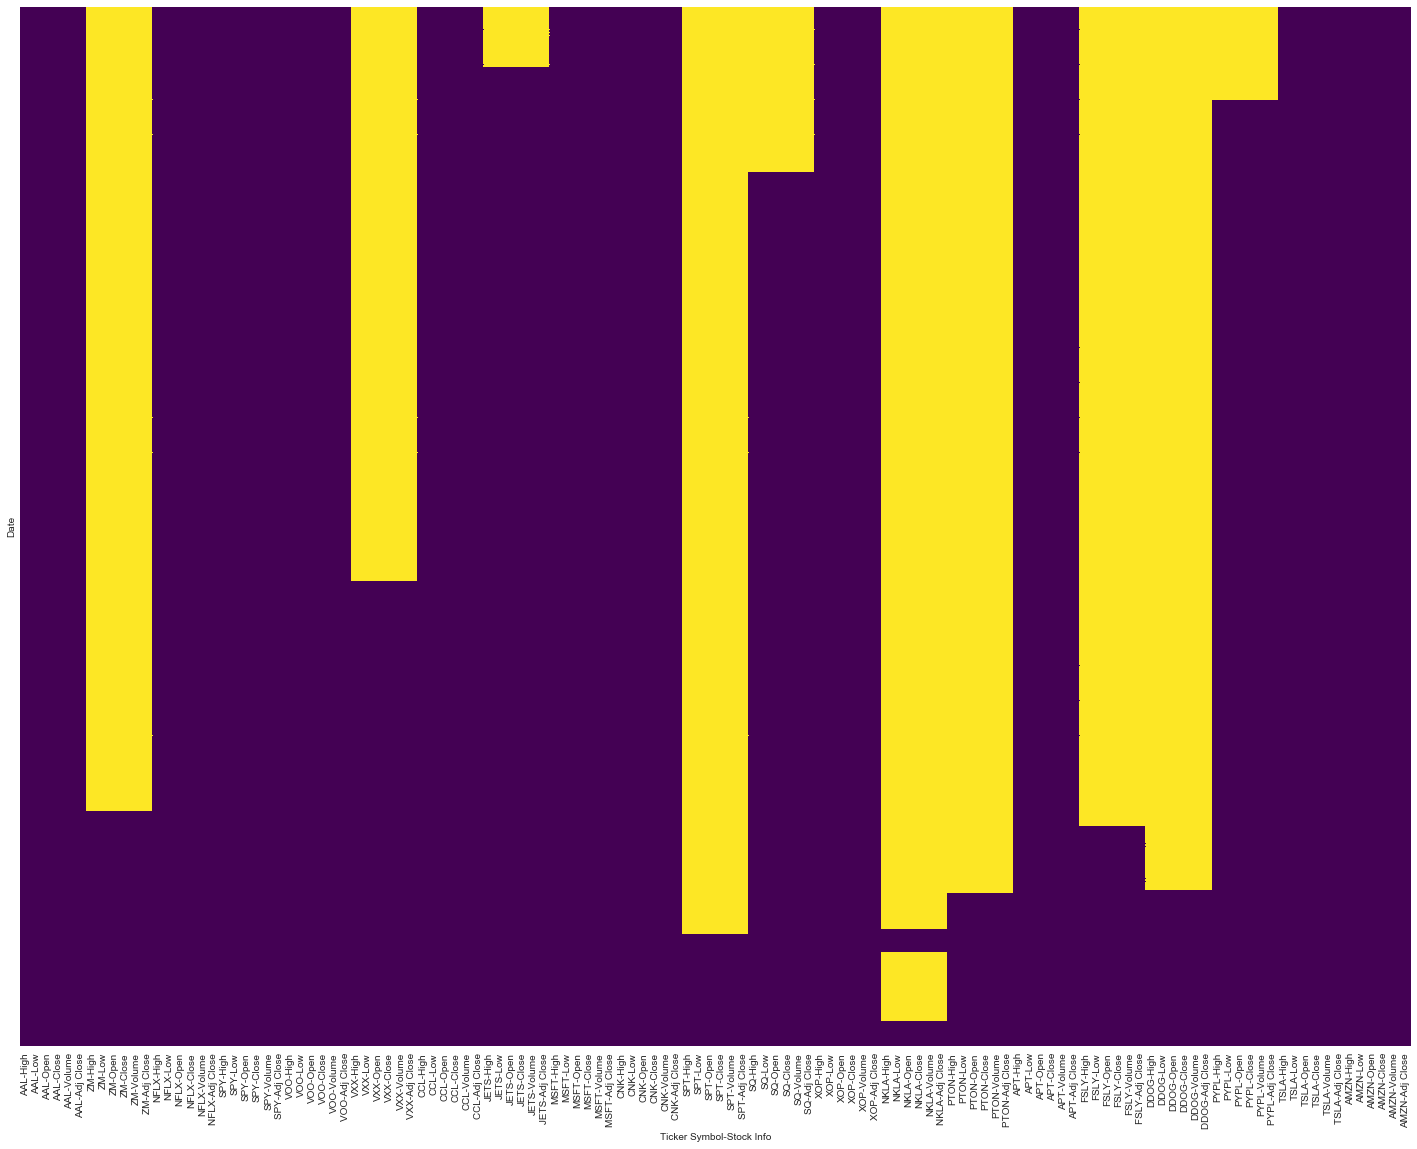

In [20]:
plt.subplots(figsize=(20,15))
plt.tight_layout()
sns.heatmap(stocks.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
# stocks.sort_index(ascending=False, inplace=True)
# stocks.head()

# Returns Analysis

In [21]:
# Looking at the closing prices for each stock
stocks.xs(key='Close',axis=1, level=1).head()

Ticker Symbol,AAL,ZM,NFLX,SPY,VOO,VXX,CCL,JETS,MSFT,CNK,...,SQ,XOP,NKLA,PTON,APT,FSLY,DDOG,PYPL,TSLA,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,53.910000,NaN,49.848572,205.429993,188.399994,NaN,45.610001,NaN,46.759998,34.910000,...,NaN,193.399994,NaN,NaN,2.61,NaN,NaN,NaN,219.309998,308.519989
2015-01-05,53.880001,NaN,47.311428,201.720001,185.089996,NaN,45.389999,NaN,46.330002,34.330002,...,NaN,181.000000,NaN,NaN,2.55,NaN,NaN,NaN,210.089996,302.190002
2015-01-06,53.040001,NaN,46.501427,199.820007,183.270004,NaN,45.830002,NaN,45.650002,33.509998,...,NaN,175.520004,NaN,NaN,2.55,NaN,NaN,NaN,211.279999,295.290009
2015-01-07,53.009998,NaN,46.742859,202.309998,185.559998,NaN,46.000000,NaN,46.230000,33.720001,...,NaN,173.759995,NaN,NaN,2.66,NaN,NaN,NaN,210.949997,298.420013
2015-01-08,53.660000,NaN,47.779999,205.899994,188.820007,NaN,46.680000,NaN,47.590000,34.669998,...,NaN,179.639999,NaN,NaN,2.65,NaN,NaN,NaN,210.619995,300.459991


Creating a new df called returns that calculates the return after each day. Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [22]:
returns = pd.DataFrame()

In [23]:
# We can use pandas pct_change() method on the Close column to create a column representing this return value. 

In [24]:
for ticker in tickers:
    returns[ticker]=stocks.xs(key=(ticker,'Close'), axis=1).pct_change()

In [25]:
returns.tail()

,AAL,ZM,NFLX,SPY,VOO,VXX,CCL,JETS,MSFT,CNK,...,SQ,XOP,NKLA,PTON,APT,FSLY,DDOG,PYPL,TSLA,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-13,-0.025963,-0.056440,-0.042334,-0.008659,-0.009047,0.096112,-0.054455,-0.015451,-0.030889,-0.027607,...,-0.073409,-0.021858,-0.005347,-0.100628,-0.039249,-0.123380,-0.101131,-0.038621,-0.030810,-0.030000
2020-07-14,-0.005159,-0.001114,-0.001180,0.012959,0.013384,-0.057605,-0.015707,0.004394,0.006181,-0.027603,...,0.021829,0.042624,-0.015014,0.022247,0.015986,-0.015986,0.025733,0.004606,0.013186,-0.006443
2020-07-15,0.161625,-0.014576,-0.003086,0.009187,0.008873,-0.028606,0.162234,0.077500,-0.001488,0.155718,...,0.007918,0.029768,0.027098,0.002859,-0.007576,0.006107,-0.004612,-0.001393,0.019258,-0.024361
2020-07-16,-0.073661,-0.029974,0.007893,-0.003293,-0.002909,-0.015499,-0.097254,-0.033063,-0.019804,-0.036491,...,-0.018412,-0.002505,-0.037560,-0.029146,0.137405,-0.051596,-0.035771,-0.013077,-0.029347,-0.002981
2020-07-17,-0.043373,-0.008047,-0.065227,0.002899,0.002646,-0.035894,-0.019645,-0.010798,-0.005100,-0.010197,...,0.006503,-0.022218,-0.070246,-0.045032,0.061951,-0.001536,0.023267,0.024204,0.000133,-0.012644


# Best and Worst Single Day Returns

In [26]:
# Date of worst single day returns.
returns.idxmin()

AAL    2020-03-18
ZM     2020-03-24
NFLX   2016-07-19
SPY    2020-03-16
VOO    2020-03-16
VXX    2020-03-23
CCL    2020-04-01
JETS   2020-03-18
MSFT   2020-03-16
CNK    2020-03-17
SPT    2020-03-09
SQ     2020-03-16
XOP    2020-03-09
NKLA   2020-06-10
PTON   2020-03-12
APT    2020-01-28
FSLY   2020-03-16
DDOG   2020-03-16
PYPL   2020-03-16
TSLA   2020-03-16
AMZN   2020-03-12
dtype: datetime64[ns]

In [27]:
# Date of worst single day returns.
returns.idxmax()

AAL    2020-06-04
ZM     2020-03-23
NFLX   2016-10-18
SPY    2020-03-24
VOO    2020-03-24
VXX    2020-03-16
CCL    2020-04-06
JETS   2020-03-24
MSFT   2020-03-13
CNK    2020-03-19
SPT    2020-05-07
SQ     2020-03-24
XOP    2020-03-10
NKLA   2020-06-03
PTON   2020-05-07
APT    2020-02-27
FSLY   2020-05-07
DDOG   2020-05-12
PYPL   2020-03-24
TSLA   2020-02-03
AMZN   2015-04-24
dtype: datetime64[ns]

# Std of returns to understand riskiness of each stock

In [28]:
# By look at the standard deviation of all the returns, we can see which stocks are more volatile
returns.std()

AAL     0.033490
ZM      0.043236
NFLX    0.026783
SPY     0.011691
VOO     0.011842
VXX     0.054198
CCL     0.031547
JETS    0.021280
MSFT    0.017377
CNK     0.033531
SPT     0.052063
SQ      0.033688
XOP     0.028067
NKLA    0.205919
PTON    0.047217
APT     0.050269
FSLY    0.062586
DDOG    0.045534
PYPL    0.021121
TSLA    0.033148
AMZN    0.019234
dtype: float64

In [29]:
# Looking at the standard deviation over YTD 2020 just to see effect of coronavirus
returns.loc['2019-01-03':'2019-07-01'].std()

AAL     0.023188
ZM      0.054501
NFLX    0.022244
SPY     0.007999
VOO     0.007868
VXX     0.036721
CCL     0.017726
JETS    0.012080
MSFT    0.013806
CNK     0.014616
SPT          NaN
SQ      0.028525
XOP     0.020330
NKLA         NaN
PTON         NaN
APT     0.019884
FSLY    0.048518
DDOG         NaN
PYPL    0.014501
TSLA    0.030299
AMZN    0.016742
dtype: float64

In [30]:
# as compared to the same time period in 2019
returns.loc['2019-01-03':'2019-07-01'].std()

AAL     0.023188
ZM      0.054501
NFLX    0.022244
SPY     0.007999
VOO     0.007868
VXX     0.036721
CCL     0.017726
JETS    0.012080
MSFT    0.013806
CNK     0.014616
SPT          NaN
SQ      0.028525
XOP     0.020330
NKLA         NaN
PTON         NaN
APT     0.019884
FSLY    0.048518
DDOG         NaN
PYPL    0.014501
TSLA    0.030299
AMZN    0.016742
dtype: float64

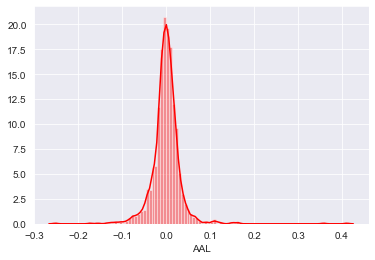

In [31]:
# We can show the distributions of the daily returns using Seaborn's distplot
a = returns["AAL"].loc[start_date:end_date].dropna()
a
plot = sns.distplot(a, bins=100, color='red')
# plot.set_xlim([-0.05, 0.05])

# Visualizations over time

In [32]:
# Using plotly to plot all the stocks over time. This graph shows daily closing prices 
stocks.xs(key='Close',axis=1,level=1).iplot()

C:\Users\80203607\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



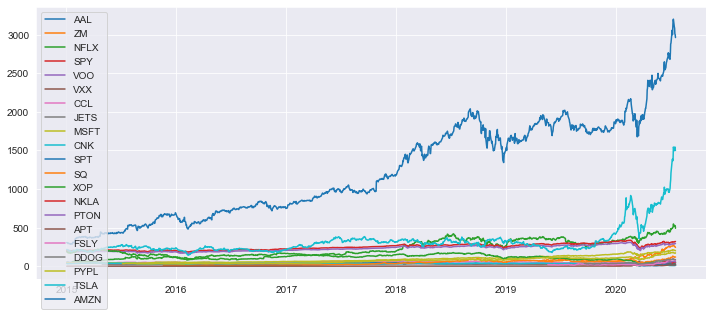

In [33]:
# Using matplotlib (in case Plotly stops working above) to plot all the stocks over time. This graph shows daily closing prices 
fig = plt.figure(figsize=(12,5))
for ticker in tickers:
    plt.plot(stocks[ticker]["Close"])
    plt.legend(tickers)

# Moving Averages

Moving averages are an important analytical tool used to identify current price trends and the potential for a change in an established trend. The simplest use of a SMA in analysis is using it to quickly identify if a security is in an uptrend or downtrend. 

Source: [Investopedia](https://www.investopedia.com/terms/s/sma.asp)

Use .ta_plot(study='sma') to create a Simple Moving Averages plot

Another popular, albeit slightly more complex, analytical use is to compare a pair of simple moving averages with each covering different time frames. If a shorter-term simple moving average is above a longer-term average, an uptrend is expected. On the other hand, if the long-term average is above a shorter-term average then a downtrend might be the expected outcome.

Two popular trading patterns that use simple moving averages include the death cross and a golden cross. A death cross occurs when the 50-day SMA crosses below the 200-day SMA. This is considered a bearish signal, that further losses are in store. The golden cross occurs when a short-term SMA breaks above a long-term SMA. Reinforced by high trading volumes, this can signal further gains are in store.

Source: [Investopedia](https://www.investopedia.com/terms/s/sma.asp)

In [38]:
each_df['AMZN']['Close'].loc[start_date:end_date].ta_plot(study='sma',periods=[13,55],title='Simple Moving Averages')

# Technical Analysis Plots

Using the Cufflinks library to create some Technical Analysis plots.

Use .iplot(kind='candle) to create a [candlestick chart](https://en.wikipedia.org/wiki/Candlestick_chart). Candlestick charts are a commonly used financial chart to show price movements in stocks

In [37]:
each_df['AAL'][['Open', 'High', 'Low', 'Close']].loc[start_date:end_date].iplot(kind='candle',title="Candlestick")

In [34]:
# I added my own bollinger bands since cufflinks looked wrong
# source: https://ad1m.github.io/derivative/bollinger_bands.html

In [35]:
tickers

['AAL',
 'ZM',
 'NFLX',
 'SPY',
 'VOO',
 'VXX',
 'CCL',
 'JETS',
 'MSFT',
 'CNK',
 'SPT',
 'SQ',
 'XOP',
 'NKLA',
 'PTON',
 'APT',
 'FSLY',
 'DDOG',
 'PYPL',
 'TSLA',
 'AMZN']

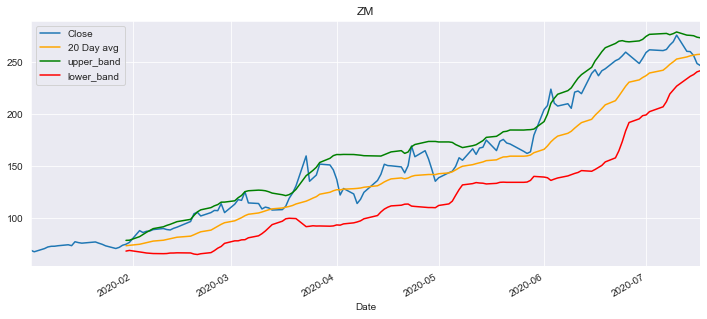

In [36]:
# Using moving averages, I can filter out some of the noise and focus on trends in the stocks
# need to gloabalize variables such as start/end date, rolling avg window, ticker symbol, etc;

def bollinger_plot(tick, start_datetime=datetime.datetime(2020,1,1), end_datetime=datetime.date.today(), window=20):
    plt.figure(figsize=(12,5))
    stocks[tick]["Close"].loc[start_datetime:end_datetime].plot(label="Close")
    rolling_mean = stocks[tick]["Close"].loc[start_datetime:end_datetime].rolling(window=window).mean()
    rolling_mean.plot(label=str(window) + " Day avg", color='orange')

    rolling_std = stocks[tick]["Close"].loc[start_datetime:end_datetime].rolling(window=window).std()
    upper_band = rolling_mean + 2*rolling_std
    lower_band = rolling_mean - 2*rolling_std
    upper_band.plot(label="upper_band", color='green')
    lower_band.plot(label="lower_band", color='red')
    
    plt.title(tick)
    plt.legend()
    
bollinger_plot("ZM", start_datetime=datetime.datetime(2020,1,1), window=20)

Use .ta_plot(study='boll') to create a [Bollinger Band Plot](https://www.investopedia.com/terms/b/bollingerbands.asp). This link is a pretty good understanding of the principles behind Bollinger Band Plots. I am primarily using this plot to understand undersold vs. oversold stocks. Here's another good [link](https://www.investopedia.com/articles/technical/102201.asp)

In [42]:
each_df['AAL']['Close'].loc[start_date:end_date].ta_plot(study='boll', title='Bolling Band Plot')